<a href="https://colab.research.google.com/github/michalejan/EEG-Neural-Representation-Prediciton-Model_BA/blob/main/EEG_Preprocessing_sub_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1. Necessary intallations

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mne
import os

In [ ]:
folder_path = '/content/drive/MyDrive/EEG_data/sub-001'

In [ ]:
cd /content/drive/MyDrive/EEG_data/sub-001

/content/drive/MyDrive/EEG_data/sub-001


In [ ]:
ls

sub-001_task-PY_eeg.fdt  sub-001_task-PY_eeg.set


In [ ]:
fname = 'sub-001_task-PY_eeg.set'

# STEP 2. Data loading

In [ ]:
# 2. Use the EPOCHS loader instead of the RAW loader (the data in fdt is already chopped up into epochs)
# 480 events in each participant file
epochs = mne.read_epochs_eeglab(fname)

Extracting parameters from /content/drive/MyDrive/EEG_data/sub-001/sub-001_task-PY_eeg.set...


/tmp/ipython-input-3404721478.py:3: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(fname)


Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [ ]:
# 3. Check the data
print(epochs)
print(f"Time range of each epoch: {epochs.tmin} to {epochs.tmax} seconds")

<EpochsEEGLAB | 480 events (all good), -0.102 – 1.199 s (baseline off), ~41.6 MiB, data loaded,
 'B2,4,8,16(240)/B18,20,24,32(241)': 20
 'B18,20,24,32(241)/B34,36,40,48(242)': 20
 'B34,36,40,48(242)': 20
 'B1,3,5,13(110)/B17,19,21,29(111)': 20
 'B17,19,21,29(111)/B33,35,37,45(112)': 20
 'B33,35,37,45(112)': 20
 'B1,4,6,14(220)/B17,20,22,30(221)': 20
 'B17,20,22,30(221)/B33,36,38,46(222)': 20
 'B33,36,38,46(222)': 20
 'B1,3,5,9(115)/B17,19,21,25(116)': 20
 and 11 more events ...>
Time range of each epoch: -0.1015625 to 1.19921875 seconds


 **CONCLUSIONS**

1. Command: epochs = mne.read_epochs_eeglab(fname) outlines that the raw EEG signals from each participant (at least for sub-001) has already been segmented into epochs for each 480 events. Some epochs contain more than one event (as was the case with multiple anomalies)
2. Command: print(f"Time range of each epoch: {epochs.tmin} to {epochs.tmax} seconds") explaisn the time range for each event:
-100ms to 1.2s (pre-stimulus to post-stimulus windows)

 **FOR METHOD'S SECTION:**

"Data were imported as pre-processed epochs using MNE-Python. Each participant's data consisted of 480 trials. Epochs were extracted from -100ms to 1200ms relative to stimulus onset, providing a sufficient window for the analysis of the P600 component (500-800ms)."

# STEP 3. FILTERING THE DENOISING THE DATA

**1. High-Pass (0.1Hz) and Low-Pass (30 Hz) Frequency Filtering**
Applying these filters are done to limit signal deterrants such as muscle activitt in the jaw or neck / sweat / participant movement. Done in order to have readable signals that demonstrate the ERP components by using the FINITE IMPULSE RESPONSE (FIR) by default
**2. Baseline Correction**
Subtracting the pre-stimulus average in order to level the voltage of the onset of the stimulus. After applying this basline correction we can see that the "baseline" voltage of the signal is close to 0.

**TO INCLUDE IN THE METHODS:**

"To ensure a stable starting point for ERP measurement, baseline correction was applied using the 100ms pre-stimulus interval (-101 to 0 ms). This centered the signal at 0 $\mu V$ relative to the stimulus onset, allowing for the accurate measurement of the P600 positive-going shift."

In [ ]:
# 1. Apply the 0.1 - 30 Hz filter to the epochs
# This removes any remaining low-frequency drift and high-frequency noise
epochs_filtered = epochs.copy().filter(l_freq=0.1, h_freq=30.0)

Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8449 samples (33.004 s)



/tmp/ipython-input-2523324594.py:3: RuntimeWarning: filter_length (8449) is longer than the signal (334), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_filtered = epochs.copy().filter(l_freq=0.1, h_freq=30.0)


Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8449 samples (33.004 s)



/tmp/ipython-input-3162575082.py:4: RuntimeWarning: filter_length (8449) is longer than the signal (334), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_filtered = epochs.copy().filter(l_freq=0.1, h_freq=30.0)


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


/tmp/ipython-input-3162575082.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


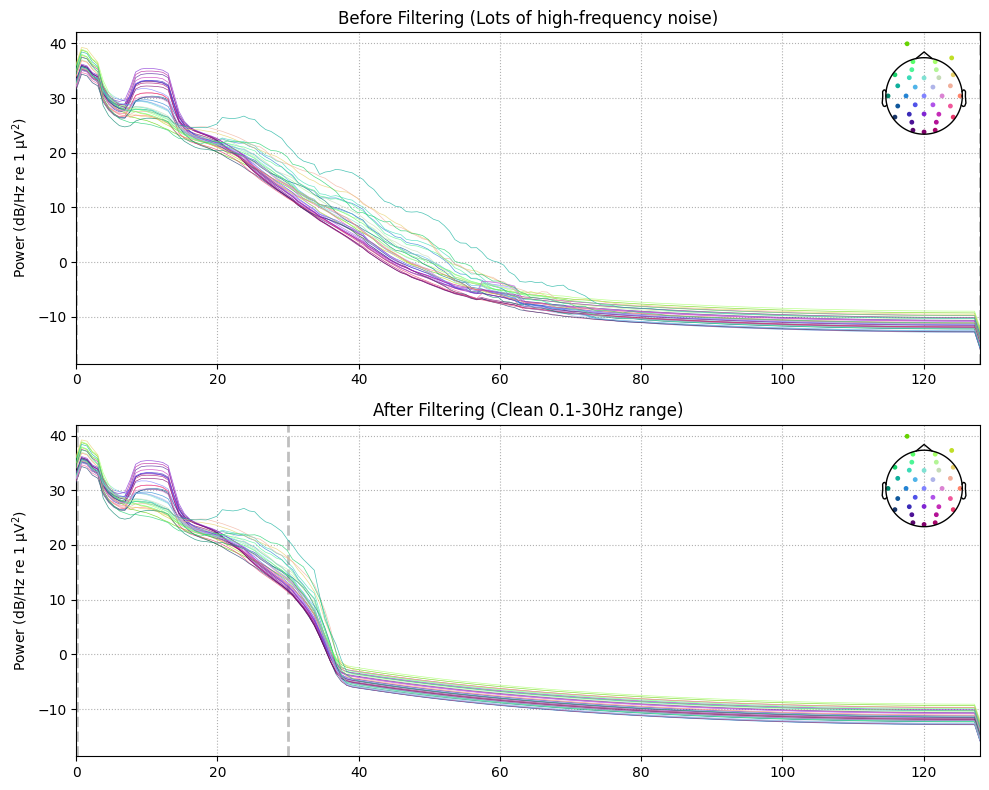

In [ ]:
import matplotlib.pyplot as plt

# 1. Filter the data
epochs_filtered = epochs.copy().filter(l_freq=0.1, h_freq=30.0)

# 2. Compare the power spectrum (the "Frequency Fingerprint")
# This will show you a graph of how much noise we cut out
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

epochs.compute_psd().plot(axes=ax[0], show=False)
ax[0].set_title("Before Filtering (Lots of high-frequency noise)")

epochs_filtered.compute_psd().plot(axes=ax[1], show=False)
ax[1].set_title("After Filtering (Clean 0.1-30Hz range)")

plt.tight_layout()
plt.show()

In [ ]:
# 2. Apply Baseline Correction
# We use the time before the stimulus (-0.1 to 0) to "level" the signal
epochs_filtered.apply_baseline(baseline=(-0.1, 0))


Applying baseline correction (mode: mean)


<EpochsEEGLAB | 480 events (all good), -0.102 – 1.199 s (baseline -0.1 – 0 s), ~41.6 MiB, data loaded,
 'B2,4,8,16(240)/B18,20,24,32(241)': 20
 'B18,20,24,32(241)/B34,36,40,48(242)': 20
 'B34,36,40,48(242)': 20
 'B1,3,5,13(110)/B17,19,21,29(111)': 20
 'B17,19,21,29(111)/B33,35,37,45(112)': 20
 'B33,35,37,45(112)': 20
 'B1,4,6,14(220)/B17,20,22,30(221)': 20
 'B17,20,22,30(221)/B33,36,38,46(222)': 20
 'B33,36,38,46(222)': 20
 'B1,3,5,9(115)/B17,19,21,25(116)': 20
 and 11 more events ...>

In [ ]:
data = epochs_filtered.get_data(tmin=-0.1, tmax=0)
print(f"Average voltage during baseline after correction: {data.mean()}")

Average voltage during baseline after correction: -2.589474721398479e-08


# VISUALIZATION OF THE FIRST 5 TRIALS

Using matplotlib as 2D backend.


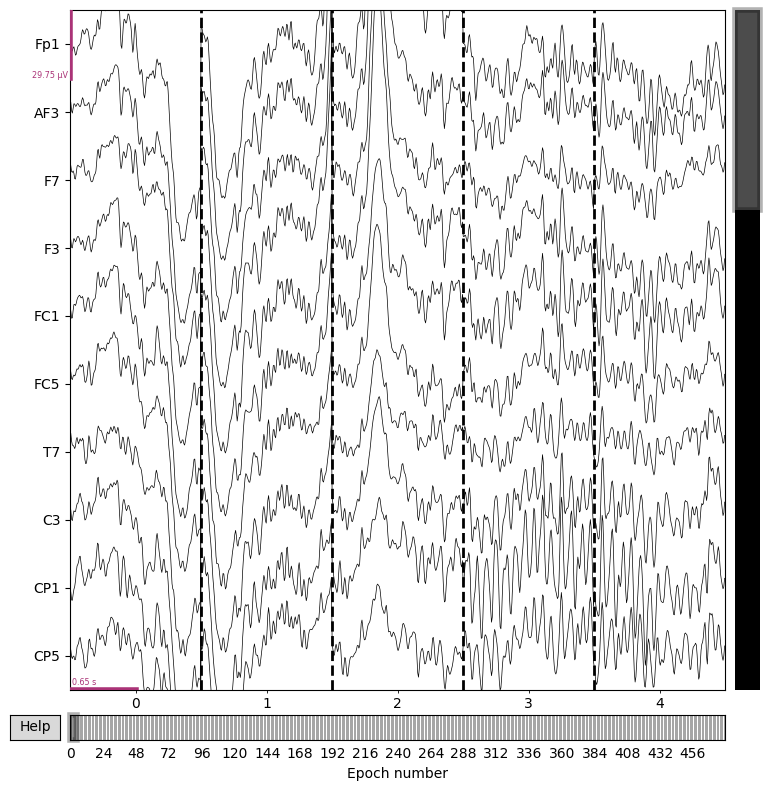

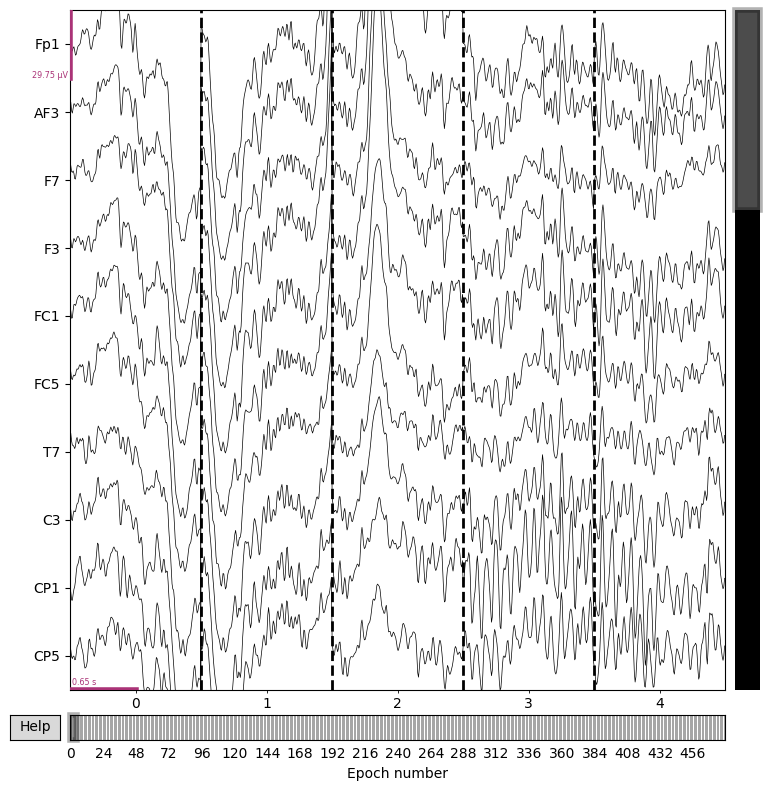

In [ ]:
# 3. Plot the first 5 trials to see the brain waves
epochs_filtered.plot(n_epochs=5, n_channels=10, scalings='auto')

# STEP 4. ARTIFACT MANAGEMENT (ICA filtering)

ICA (Independent Component Analysis) identifies a specific pattern of an eye blink and subtracts it form the data without deleting the trial. It keeps all of the 480 trials. We use an automatic algorithmic technique to clean the signal from eye blinks.

In [ ]:
from mne.preprocessing import ICA

In [ ]:
# 1. Initialize ICA
# n_components=20 is usually enough to find blinks in a 32-64 channel setup
ica = ICA(n_components=20, random_state=97, method='fastica')

In [ ]:
# 2. Fit ICA to the filtered epochs
ica.fit(epochs_filtered)

Fitting ICA to data using 34 channels (please be patient, this may take a while)


/tmp/ipython-input-1000318091.py:2: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs_filtered)


Selecting by number: 20 components
Fitting ICA took 15.8s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,51 iterations on epochs (160320 samples)
ICA components,20
Available PCA components,34
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
# 3. Find the "Blink" components automatically
# We use channel 'Fp1' or 'Fp2' as a proxy because they sit right above the eyes
blink_indices, scores = ica.find_bads_eog(epochs_filtered, ch_name='Fp1', threshold=3.0)

Using EOG channel: Fp1


In [ ]:
print(f"Automatically identified blink components: {blink_indices}")

Automatically identified blink components: [np.int64(4)]


In [ ]:
# 4. Apply the ICA to the data (this actually removes the blinks)
ica.exclude = blink_indices
epochs_cleaned = epochs_filtered.copy()
ica.apply(epochs_cleaned)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 34 PCA components


/tmp/ipython-input-2759142562.py:4: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(epochs_cleaned)


<EpochsEEGLAB | 480 events (all good), -0.102 – 1.199 s (baseline -0.1 – 0 s), ~41.6 MiB, data loaded,
 'B2,4,8,16(240)/B18,20,24,32(241)': 20
 'B18,20,24,32(241)/B34,36,40,48(242)': 20
 'B34,36,40,48(242)': 20
 'B1,3,5,13(110)/B17,19,21,29(111)': 20
 'B17,19,21,29(111)/B33,35,37,45(112)': 20
 'B33,35,37,45(112)': 20
 'B1,4,6,14(220)/B17,20,22,30(221)': 20
 'B17,20,22,30(221)/B33,36,38,46(222)': 20
 'B33,36,38,46(222)': 20
 'B1,3,5,9(115)/B17,19,21,25(116)': 20
 and 11 more events ...>

# STEP 5. GROUPING BY CONDITION

We group:
a. BIN 1 = Well-Formed
b. BIN 3 = Structurally valid

In [ ]:
# 1.Helper function to find all labels containing our trigger numbers
def find_labels(epochs, triggers):
    return [name for name in epochs.event_id.keys() if any(f"({t})" in name for t in triggers)]


In [ ]:
bin1_names = find_labels(epochs_cleaned, ['110', '115'])
bin3_names = find_labels(epochs_cleaned, ['220', '225'])
print(f"Found for Well-Formed: {bin1_names}")
print(f"Found for Structural Violation: {bin3_names}")

Found for Well-Formed: ['B1,3,5,13(110)/B17,19,21,29(111)', 'B1,3,5,9(115)/B17,19,21,25(116)']
Found for Structural Violation: ['B1,4,6,14(220)/B17,20,22,30(221)', 'B1,4,6,10(225)/B17,20,22,26(226)']


In [ ]:
# 2. Create the averages using these lists
evoked_well_formed = epochs_cleaned[bin1_names].average()
evoked_structural_violation = epochs_cleaned[bin3_names].average()

print("Averages created successfully!")

Averages created successfully!


# STEP 6. VISUALIZATION (standard vs P600)

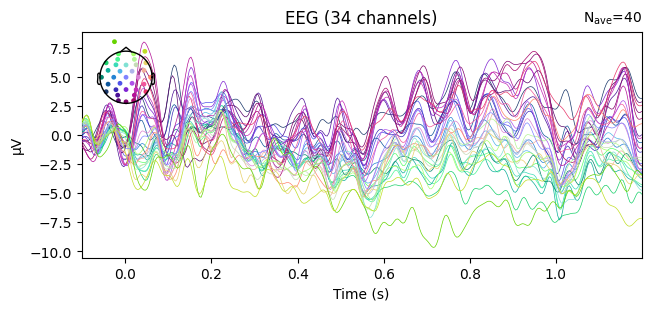

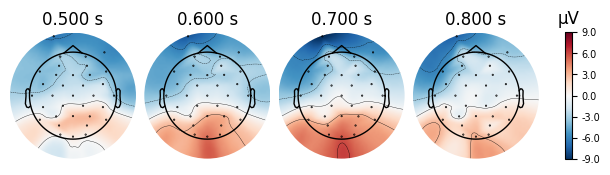

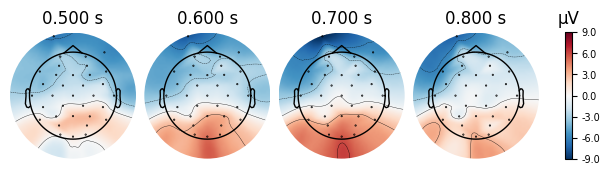

In [ ]:
# Plot the Structural Violation average
evoked_structural_violation.plot(window_title="Structurally Invalid (Bin 3)")

# Plot the Topomap specifically for your P600 window (500-800ms)
# This shows WHERE on the head the activity is strongest
evoked_structural_violation.plot_topomap(times=[0.5, 0.6, 0.7, 0.8], ch_type='eeg')

combining channels using "mean"
combining channels using "mean"


/tmp/ipython-input-809375255.py:8: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(conditions, picks='Pz', combine='mean')


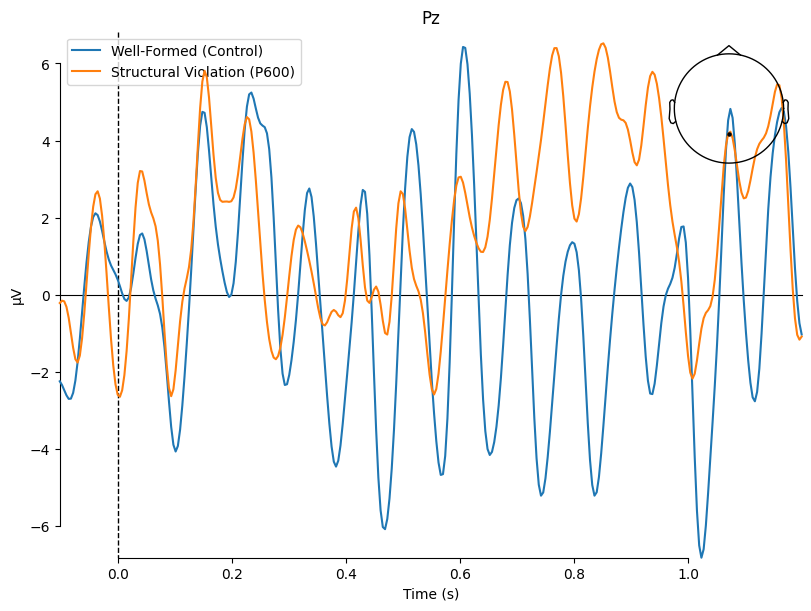

[<Figure size 800x600 with 2 Axes>]

In [ ]:
# Create a dictionary for the plot
conditions = {
    "Well-Formed (Control)": evoked_well_formed,
    "Structural Violation (P600)": evoked_structural_violation
}

# Plot comparison at channel Pz (where P600 is usually strongest)
mne.viz.plot_compare_evokeds(conditions, picks='Pz', combine='mean')

# STEP 7. EXTRACTION OF THE 500ms-800ms WINDOW

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 1. Define your window and region of interest (ROI)
t_start, t_end = 0.5, 0.8
roi = ['Pz', 'CPz', 'P3', 'P4'] # Isolating parietal electrodes where P600 is visible the most

In [ ]:
print(epochs.ch_names)

['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'LIO', 'ROC']


In [ ]:
# 1. Define the ROI using ONLY channels that exist in your output
# We dropped 'CPz' and added 'CP1', 'CP2', 'Cz' to compensate
roi = ['Pz', 'Cz', 'CP1', 'CP2', 'P3', 'P4']

print(f"Using these {len(roi)} electrodes for P600 analysis: {roi}")

Using these 6 electrodes for P600 analysis: ['Pz', 'Cz', 'CP1', 'CP2', 'P3', 'P4']


In [ ]:
# 3. Calculate the mean for each trial
# axis=(1, 2) averages across Channels (1) and Time (2)
mean_amplitudes = data.mean(axis=(1, 2))

In [ ]:
df = pd.DataFrame({
    'trial_index': range(len(mean_amplitudes)),
    'mean_amplitude': mean_amplitudes * 1e6,  # Convert to µV
    'condition': epochs_cleaned.events[:, -1] # Trigger codes
})

In [ ]:
# 5. Map the codes (Double check your numbers!)
# Based on your bin file: 110/115 = Well-Formed, 220/225 = Structurally Invalid
condition_map = {110: 'Control', 115: 'Control', 220: 'Violation', 225: 'Violation'}
df['label'] = df['condition'].map(condition_map)

ADDITIONAL VISUALIZATION

In [ ]:
# --- STEP 1: Define the Helper Function (Just in case you need it again) ---
def find_labels(epochs, triggers):
    return [name for name in epochs.event_id.keys() if any(f"({t})" in name for t in triggers)]

In [ ]:
bin1_names = find_labels(epochs_cleaned, ['110', '115'])
bin3_names = find_labels(epochs_cleaned, ['220', '225'])
print(f"Using Control events: {bin1_names}")
print(f"Using Violation events: {bin3_names}")

Using Control events: ['B1,3,5,13(110)/B17,19,21,29(111)', 'B1,3,5,9(115)/B17,19,21,25(116)']
Using Violation events: ['B1,4,6,14(220)/B17,20,22,30(221)', 'B1,4,6,10(225)/B17,20,22,26(226)']


In [ ]:
evoked_control = epochs_cleaned[bin1_names].average()
evoked_violation = epochs_cleaned[bin3_names].average()

In [ ]:
# Define the ROI (Region of Interest)
roi = ['Pz', 'Cz', 'CP1', 'CP2', 'P3', 'P4']

In [ ]:
# Create the dictionary for plotting
evokeds = {
    'Control': evoked_control,
    'Violation': evoked_violation
}

combining channels using "mean"
combining channels using "mean"


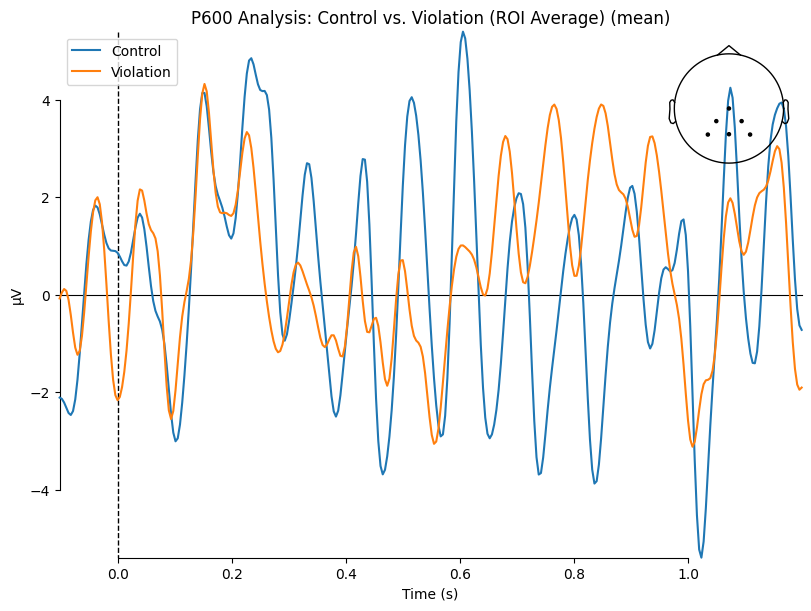

In [ ]:
fig = mne.viz.plot_compare_evokeds(
    evokeds,
    picks=roi,                # Use your parietal electrodes
    combine='mean',           # Average them into one line per condition
    title='P600 Analysis: Control vs. Violation (ROI Average)',
    show_sensors=True         # Shows the little head map
)
# Access the figure to add the grey shading
# fig is a list of figures, we grab the first one
for ax in fig[0].axes:
    # Shade the 500-800ms window
    ax.axvspan(0.5, 0.8, color='grey', alpha=0.2, label='P600 Window')
    ax.legend(loc='upper right') # Ensure legend is visible
plt.show()

In [ ]:
# Check what is actually inside the 'condition' and 'label' columns
print("Unique Event Codes in data:", df['condition'].unique())
print("Unique Labels (after mapping):", df['label'].unique())

Unique Event Codes in data: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Unique Labels (after mapping): [nan]


ISSUE WITH UNIQUE LABELS / fix below

In [ ]:
# 1. Create a "Reverse Dictionary" to look up the Name from the ID
# MNE stores this in epochs.event_id as {Name: ID} -> we want {ID: Name}
id_to_text = {v: k for k, v in epochs_cleaned.event_id.items()}

In [ ]:
# 2. Define a function to translate ID -> Text -> "Control/Violation"
def solve_label(event_id):
    # Get the long string name (e.g., "B1...(110)...")
    text_label = id_to_text.get(event_id, "")

    # INDENTATION FIX IS HERE:
    if '(110)' in text_label or '(115)' in text_label:
        return 'Control'
    elif '(220)' in text_label or '(225)' in text_label:
        return 'Violation'
    else:
        return None

In [ ]:
# 3. Apply this function to your dataframe
df['label'] = df['condition'].apply(solve_label)

In [ ]:
# 4. Drop rows that are None
df_final = df.dropna(subset=['label'])

In [ ]:
# 5. Check the stats
print("Unique Labels found:", df_final['label'].unique())
print(df_final.groupby('label')['mean_amplitude'].agg(['mean', 'std', 'count']))

Unique Labels found: ['Control' 'Violation']
               mean       std  count
label                               
Control   -0.090874  0.276534     40
Violation  0.045119  0.266462     40


# STEP 8. DOWNLOADING THE RESULTS

In [ ]:
import numpy as np

In [ ]:
# SAVING
df_final.to_csv('sub-001_P600_mean_amplitudes.csv', index=False)

In [ ]:
# Save the actual cleaned brain signals (The MNE Object)
# This allows you to load 'epochs_cleaned' tomorrow without re-processing!
epochs_cleaned.save('sub-001_cleaned_epo.fif', overwrite=True)

[PosixPath('/content/drive/MyDrive/EEG_data/sub-001/sub-001_cleaned_epo.fif')]

GENERATING A REPORT

In [ ]:
n_control = len(df_final[df_final['label'] == 'Control'])
n_violation = len(df_final[df_final['label'] == 'Violation'])
mean_control = df_final[df_final['label'] == 'Control']['mean_amplitude'].mean()
mean_violation = df_final[df_final['label'] == 'Violation']['mean_amplitude'].mean()
diff = mean_violation - mean_control

print("="*60)
print(f"   PREPROCESSING SUMMARY REPORT: SUBJECT sub-001")
print("="*60)
print(f"1. DATA CLEANING")
print(f"   - Filter Range:      0.1 Hz - 30.0 Hz")
print(f"   - Baseline Corr:     -100 ms to 0 ms")
print(f"   - Artifact Clean:    ICA (Blinks removed)")
print(f"   - Total Good Trials: {len(df_final)} (from original 480)")
print("-" * 60)

print(f"2. P600 EXTRACTION SETTINGS")
print(f"   - Time Window:       500 ms - 800 ms")
print(f"   - ROI Electrodes:    {roi}")
print("-" * 60)

print(f"3. CONDITION COUNTS (Valid Trials)")
print(f"   - Control (Well-Formed):        {n_control} trials")
print(f"   - Violation (Structural Error): {n_violation} trials")
print("-" * 60)

print(f"4. PRELIMINARY RESULTS (P600 Effect)")
print(f"   - Mean Amp (Control):   {mean_control:.3f} µV")
print(f"   - Mean Amp (Violation): {mean_violation:.3f} µV")
print(f"   - EFFECT SIZE (Diff):   {diff:+.3f} µV")
print(f"   - Direction:            {'POSITIVE (P600-like)' if diff > 0 else 'NEGATIVE'}")
print("="*60)
print("Files saved: 'sub-001_P600_mean_amplitudes.csv' and 'sub-001_cleaned_epo.fif'")

   PREPROCESSING SUMMARY REPORT: SUBJECT sub-001
1. DATA CLEANING
   - Filter Range:      0.1 Hz - 30.0 Hz
   - Baseline Corr:     -100 ms to 0 ms
   - Artifact Clean:    ICA (Blinks removed)
   - Total Good Trials: 80 (from original 480)
------------------------------------------------------------
2. P600 EXTRACTION SETTINGS
   - Time Window:       500 ms - 800 ms
   - ROI Electrodes:    ['Pz', 'Cz', 'CP1', 'CP2', 'P3', 'P4']
------------------------------------------------------------
3. CONDITION COUNTS (Valid Trials)
   - Control (Well-Formed):        40 trials
   - Violation (Structural Error): 40 trials
------------------------------------------------------------
4. PRELIMINARY RESULTS (P600 Effect)
   - Mean Amp (Control):   -0.091 µV
   - Mean Amp (Violation): 0.045 µV
   - EFFECT SIZE (Diff):   +0.136 µV
   - Direction:            POSITIVE (P600-like)
Files saved: 'sub-001_P600_mean_amplitudes.csv' and 'sub-001_cleaned_epo.fif'


DOWNLOADING THE TWO FILES .CSV AND .FIF LOCALLY

In [ ]:
save_path = '/content/drive/MyDrive/EEG_data/P600_Results/sub-001'
os.makedirs(save_path, exist_ok=True)

print(f"📂 Saving files to: {save_path} ...")

📂 Saving files to: /content/drive/MyDrive/EEG_data/P600_Results/sub-001 ...


In [ ]:
# 3. Save the CSV (The Statistics Table)
csv_filename = os.path.join(save_path, 'sub-001_P600_mean_amplitudes.csv')
df_final.to_csv(csv_filename, index=False)
print(f"✅ CSV saved: {csv_filename}")

✅ CSV saved: /content/drive/MyDrive/EEG_data/P600_Results/sub-001/sub-001_P600_mean_amplitudes.csv


In [ ]:
# 4. Save the FIF (The Cleaned Brain Signals)
fif_filename = os.path.join(save_path, 'sub-001_cleaned_epo.fif')
epochs_cleaned.save(fif_filename, overwrite=True)
print(f"✅ FIF saved: {fif_filename}")

✅ FIF saved: /content/drive/MyDrive/EEG_data/P600_Results/sub-001/sub-001_cleaned_epo.fif
